In [1]:
import json, codecs
import numpy as np

_vector_encoder_train = json.loads(codecs.open('vector_encoder_train.json', 'r', encoding='utf-8').read())
vector_encoder_train = np.array(_vector_encoder_train)

_vector_encoder_test = json.loads(codecs.open('vector_encoder_test.json', 'r', encoding='utf-8').read())
vector_encoder_test = np.array(_vector_encoder_test)

_X_train = json.loads(codecs.open('X_train.json', 'r', encoding='utf-8').read())
X_train = [np.array(_X_train)]

_X_test = json.loads(codecs.open('X_test.json', 'r', encoding='utf-8').read())
X_test = [np.array(_X_test)]

y_train = json.loads(codecs.open('y_train.json', 'r', encoding='utf-8').read())

y_test = json.loads(codecs.open('y_test.json', 'r', encoding='utf-8').read())

#### Shaping the data

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, Flatten
import numpy as np


Y_train = np.array(y_train, dtype=np.int32)
y_train_of_zeros = np.zeros((Y_train.shape[0], 3),dtype=np.float32)
y_train_of_zeros[np.arange(Y_train.shape[0]), Y_train] = 1.0
train_labels = y_train_of_zeros.reshape(y_train_of_zeros.shape[0],1,y_train_of_zeros.shape[1])


Y_test = np.array(y_test, dtype=np.int32)
y_test_of_zeros = np.zeros((Y_test.shape[0], 3),dtype=np.float32)
y_test_of_zeros[np.arange(Y_test.shape[0]), Y_test] = 1.0
valid_test_labels = y_test_of_zeros.reshape(y_test_of_zeros.shape[0],1,y_test_of_zeros.shape[1])



train_set = vector_encoder_train.reshape(vector_encoder_train.shape[0],
                                                             vector_encoder_train.shape[1],1)
valid_test_set = np.asarray(vector_encoder_test).reshape(vector_encoder_test.shape[0],
                                                            vector_encoder_test.shape[1],1)

validation_labels = valid_test_labels[:100]
test_labels = valid_test_labels[100:]

validation_set = valid_test_set[:100]
test_set = valid_test_set[100:]

#### Modeling

In [3]:
model = Sequential()
model.add(Conv1D(256,kernel_size=train_set.shape[1],activation='relu',
                            input_shape = (15,1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.2))

model.add(Conv1D(256,kernel_size=1,activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.2))


model.add(Conv1D(256,kernel_size=1,activation='relu'))
model.add(MaxPooling1D(pool_size=1))

model.add(Dense(3,activation='relu'))

model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_set, train_labels, batch_size=100, epochs=100)
print('done')


Epoch 1/100
11/11 [==============================] - 16s 22ms/step - loss: 1.0877 - accuracy: 0.4038
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 0.9943 - accuracy: 0.4796
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 0.8779 - accuracy: 0.5072
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.7951 - accuracy: 0.6182
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.7261 - accuracy: 0.6583
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 0.6900 - accuracy: 0.6593
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6598 - accuracy: 0.6764
Epoch 8/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6414 - accuracy: 0.6988
Epoch 9/100
11/11 [==============================] - 0s 12ms/step - loss: 0.6274 - accuracy: 0.7121
Epoch 10/100
11/11 [==============================] - 0s 15ms/step - loss: 0.6168 - accuracy: 0.7094

In [4]:
results = model.evaluate(validation_set, validation_labels, batch_size=100)
predicted_labels = (model.predict(test_set) > 0.5).astype("float32")

1/1 [==============================] - 0s 237ms/step - loss: 0.4688 - accuracy: 0.9400


In [7]:
from sklearn import preprocessing
predicted_labels_reshaped = predicted_labels.reshape(predicted_labels.shape[0],-1)
lb = preprocessing.LabelBinarizer()
Y = [0,1,2]
Y_bin = lb.fit_transform(Y) # label binarizer will convert it to a 0/1's
#print(Y_bin)
max_idx = predicted_labels_reshaped.argmax(axis=1) #get the indexes for the max probabilities
out_labels = [lb.classes_[i] for i in max_idx]
print(out_labels)

[2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 

<AxesSubplot:>

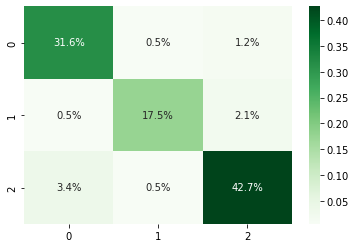

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test[100:], out_labels, labels=[0,1,2])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%', cmap='Greens')

In [13]:
model.save('L3-CNN.model')

INFO:tensorflow:Assets written to: L3-CNN.model\assets
